In [6]:
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [7]:
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Define plot formatter:
def plot_format(ax):
    params = {'axes.labelsize': 13, 'font.size': 16, 'legend.fontsize': 11, 'xtick.labelsize': 13, 'ytick.labelsize': 13, 'figure.figsize': [8, 8 / 1.618]}
    plt.rcParams.update(params)
    colors = cycler('color', ['#B22222', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
    plt.rc('axes', facecolor='#E6E6E6', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors)
    plt.rc('grid', color='w', linestyle='solid')
    plt.rc('xtick', direction='out', color='black')
    plt.rc('ytick', direction='out', color='black')
    plt.rc('patch', edgecolor='#E6E6E6')
    plt.rc('lines', linewidth=2)
    
    fig = plt.gcf()
    rect = plt.Rectangle((-0.02, -0.02), 1.04, 1.04, fill=False, edgecolor='black', linewidth=4, transform=fig.transFigure, figure=fig)
    fig.patches.extend([rect])
    plt.tight_layout(pad=0)

def plot_continuous():
    N = 1000
    L = 1.0
    radius = np.arange(0.0001, 0.035, 0.001)
    x0 = radius * 0.0 + 10.0

    def equation(x, r):
        g = np.pi * r**2 / L**2
        return (1 - (1 - g)**(x * N)) * (1 - x) - x * (1 - g)**(N - 1)

    num = newton(equation, x0, args=(radius,), tol=0.001)
    x, exp, th = np.loadtxt("../output/outfile_continuous.txt", unpack=True)

    plt.figure(figsize=(8, 6))
    plt.plot(x, th, "--", label="Analytical Solution")
    plt.plot(x, num, "k:", label="Numerical Solution")
    plt.plot(x, exp, ".", label="Simulation")
    plt.title("N = 1000, L = 1")
    plt.xlabel("Packing Factor")
    plt.ylabel("n")
    plt.ylim(0, 1)
    plt.xlim(0, 4)
    plt.legend(loc="best")
    plt.grid(True)
    plot_format(plt.gca())
    plt.savefig("../output/continuous_plot.png", dpi=500, bbox_inches='tight', pad_inches=0, facecolor='#C0C0C0')
    plt.show()

def plot_discrete():
    n, p = np.loadtxt("../output/outfile_discrete.txt", unpack=True)
    plt.figure(figsize=(8, 6))
    plt.plot(n, p, ".")
    plt.title("L = 250, 4 Neighbors")
    plt.xlabel("N")
    plt.ylabel("n")
    plt.ylim(0, 1)
    plt.grid(True)
    plot_format(plt.gca())
    plt.savefig("../output/discrete_plot.png", dpi=500, bbox_inches='tight', pad_inches=0, facecolor='#C0C0C0')
    plt.show()

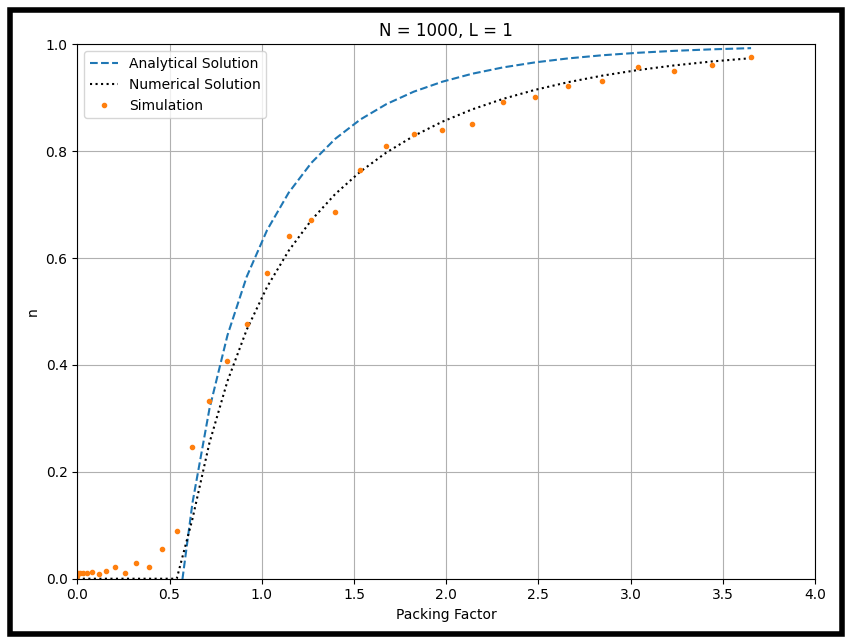

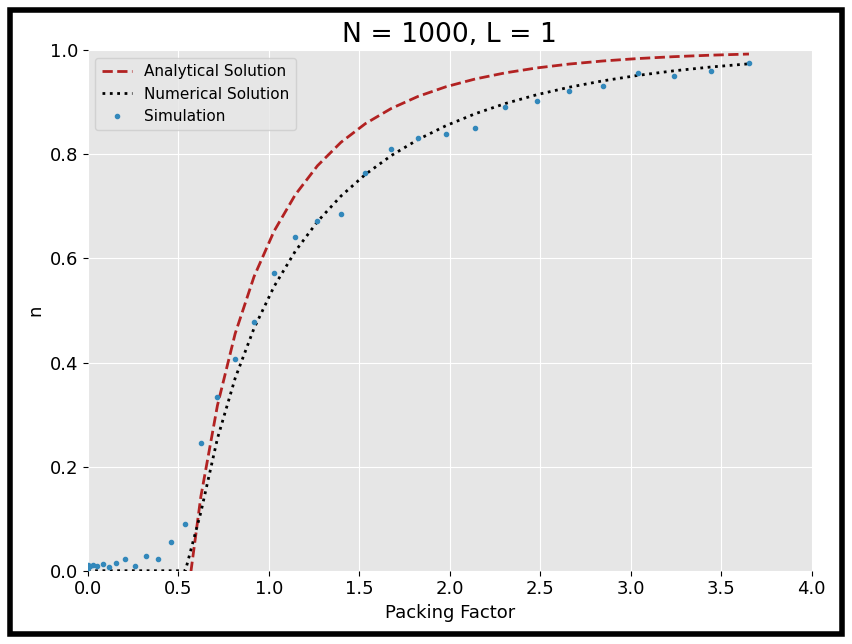

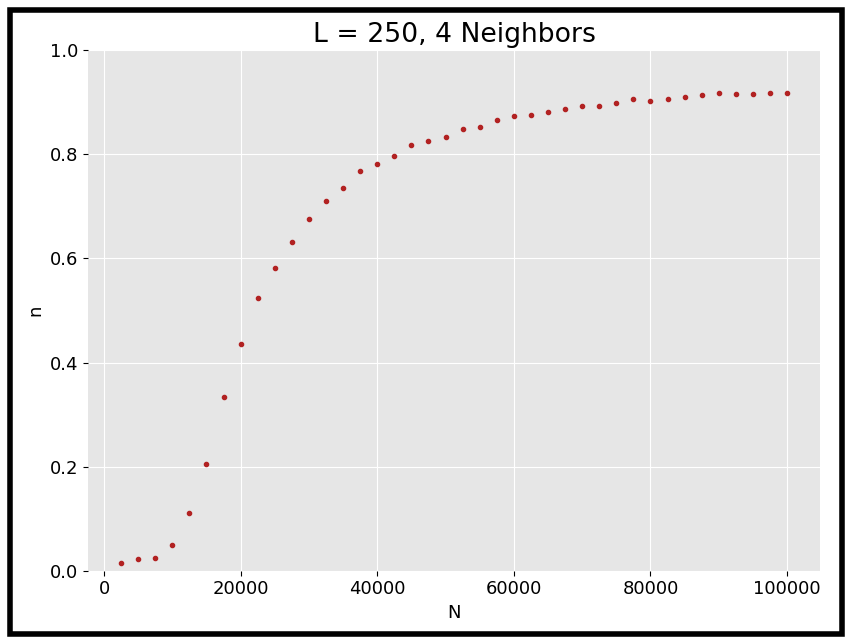

In [8]:
plot_continuous()
plot_continuous()
plot_discrete()